In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Loading the Data
df = pd.read_csv('DATA/admission_data.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


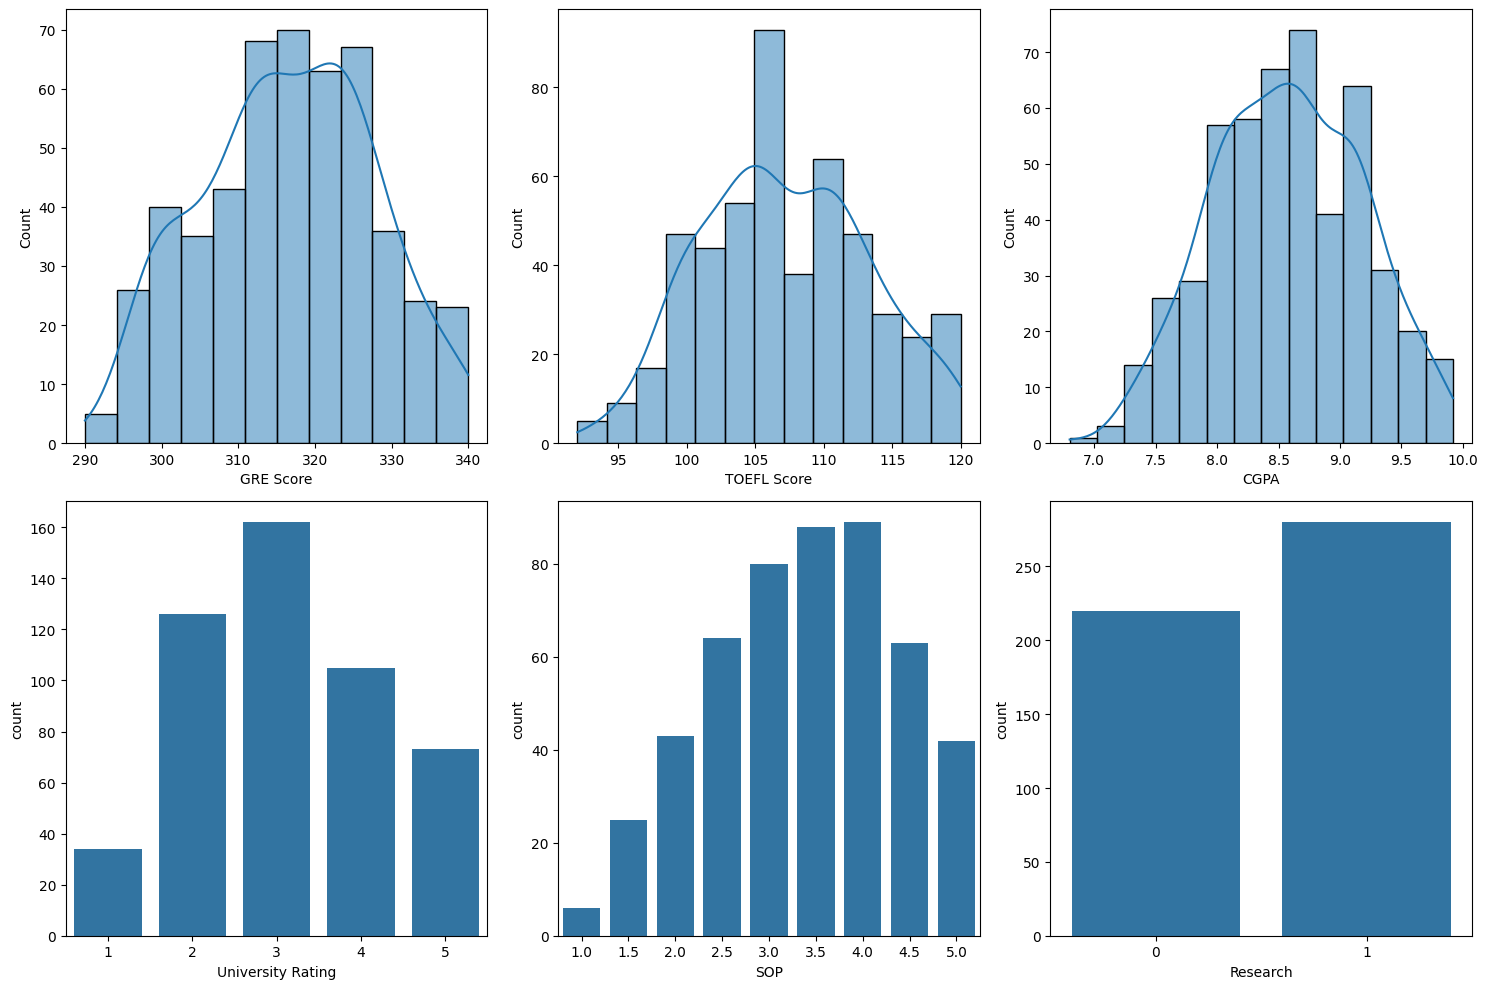

In [2]:
# Visualization of Distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(df['GRE Score'], kde=True, ax=axes[0, 0])
sns.histplot(df['TOEFL Score'], kde=True, ax=axes[0, 1])
sns.histplot(df['CGPA'], kde=True, ax=axes[0, 2])
sns.countplot(x='University Rating', data=df, ax=axes[1, 0])
sns.countplot(x='SOP', data=df, ax=axes[1, 1])
sns.countplot(x='Research', data=df, ax=axes[1, 2])
plt.tight_layout()
plt.show()

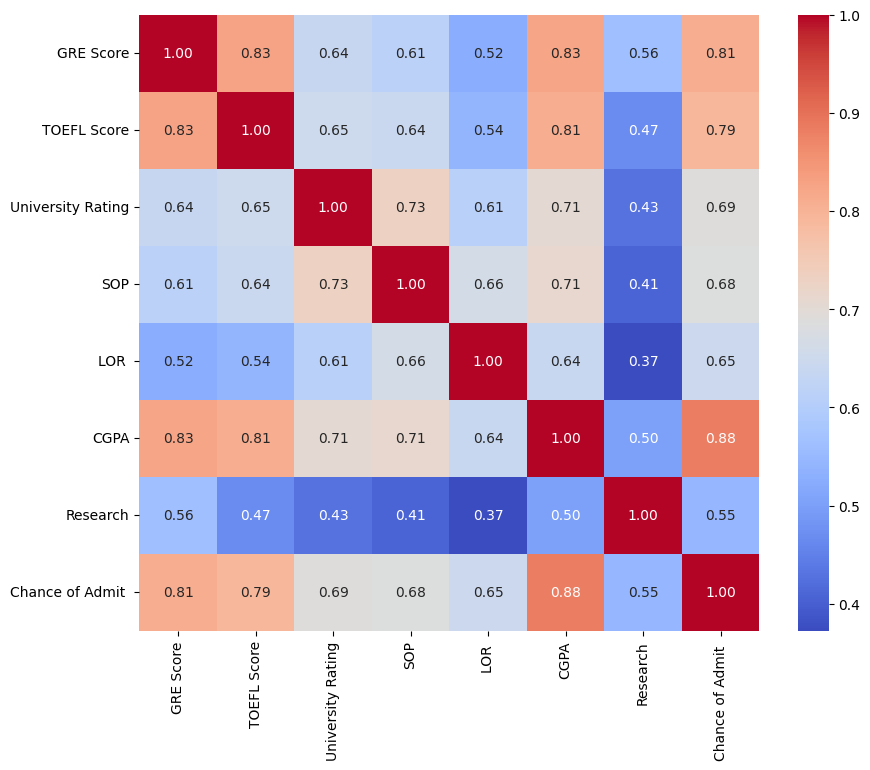

In [3]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [4]:
# Definition of Variables
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [5]:
# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Training and Testing Set Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluation
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linear)))
print("Linear Regression R2:", r2_score(y_test, y_pred_linear))

Linear Regression RMSE: 0.060865880415783113
Linear Regression R2: 0.8188432567829629


In [8]:
# Ridge and Lasso Models
ridge_model = Ridge()
lasso_model = Lasso()

# Training and Prediction
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluation
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge R2:", r2_score(y_test, y_pred_ridge))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("Lasso R2:", r2_score(y_test, y_pred_lasso))

Ridge RMSE: 0.060873358676743504
Ridge R2: 0.8187987385531803
Lasso RMSE: 0.1435208369018241
Lasso R2: -0.00724844132029312


In [9]:
# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Random Forest RMSE: 0.06540954288175392
Random Forest R2: 0.7907868801955988


In [10]:
# GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best parameters:", grid_search.best_params_)

# Evaluation of the Optimized Model
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
print("Optimized Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best_rf)))
print("Optimized Random Forest R2:", r2_score(y_test, y_pred_best_rf))

Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
Optimized Random Forest RMSE: 0.06396110421168695
Optimized Random Forest R2: 0.7999499827883483


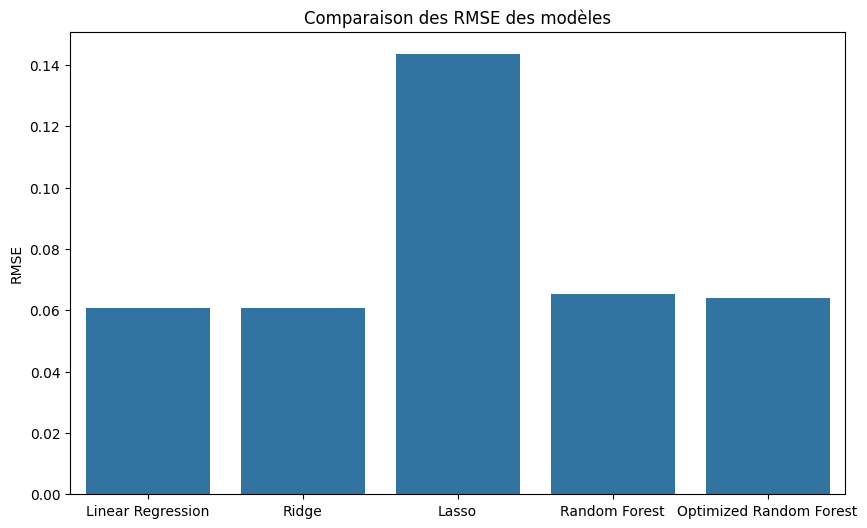

In [11]:
# Model Comparison
models = ['Linear Regression', 'Ridge', 'Lasso', 'Random Forest', 'Optimized Random Forest']
rmse_scores = [
    np.sqrt(mean_squared_error(y_test, y_pred_linear)),
    np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=rmse_scores)
plt.title('Comparaison des RMSE des modèles')
plt.ylabel('RMSE')
plt.show()